In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 시각화 한글처리
import platform

if platform.system() == 'Darwin':    # 맥
    font_name = 'AppleGothic'
elif platform.system() == 'Linux':   # 리눅스
    font_name = 'NanumGothic'
elif platform.system() == 'Windows': # 윈도우
    font_name = 'Malgun Gothic'
else:
    print('알수없는 시스템. 미적용')

plt.rc('font', family=font_name)

In [3]:
## 데이터 불러오기 ##
# 파라미터 정보 :
# encoding='euc-kr' : 한글파일 처리
# index_col=[0,1] : 데이터의 row index 처리
# header=[0,1] : 컬럼명 처리
# df = pd.read_csv('./data/성인의독서장소.csv', encoding='euc-kr', index_col=[0,1], header=[0,1])
df = pd.read_csv('./data/성인의독서장소.csv', encoding='euc-kr', header=[0,1])

In [4]:
# 데이터 확인 - head
df.head()

통계분류(1) 통계분류(2) 2004                                                2006  \
  통계분류(1) 통계분류(2)  사례수   집에서 직장(학교)에서 출퇴근(통학)시 차 안에서 도서관에서 가리지않음  기 타  사례수   
0      전체      소계  752  61.4     20.9            5.2   2.4   9.6  0.5  799   
1      성별      남자  358  53.9     25.7              5   4.2  10.9  0.3  417   
2      성별      여자  394  68.3     16.5            5.3   0.8   8.4  0.8  382   
3     연령별  20대 이하  293  60.1     17.1            6.8   4.1  11.9    0  236   
4     연령별  19~29세    -     -        -              -     -     -    -    -   

   ... 2015  2017                                                      
   ...  기 타   사례수   집에서 직장(학교)에서 도서관에서 밖에서 이동할 때 가리지않음 카페에서 서점에서  기 타  
0  ...  0.9  3739    59     13.2   5.1      10.1   5.3  4.5  2.1  0.7  
1  ...  1.1  1832  56.8     16.1   4.8      10.9   5.4  3.6  1.9  0.4  
2  ...  0.8  1907  61.2     10.3   5.4       9.3   5.1  5.4  2.2  1.1  
3  ...    -     -     -        -     -         -     -    -    -    -  
4  ...  1.1   842  48.7     15.3   8.8      12.7     5  7.5  1.9  0.1  

[5 rows x 76 columns]

In [5]:
# 데이터 확인 - tail
df.tail()

통계분류(1) 통계분류(2) 2004                                              \
          통계분류(1) 통계분류(2)  사례수 집에서 직장(학교)에서 출퇴근(통학)시 차 안에서 도서관에서 가리지않음 기 타   
39    연간 일반도서 독서량  16~20권    -   -        -              -     -     -   -   
40    연간 일반도서 독서량  21권 이상    -   -        -              -     -     -   -   
41  인근지역 공공도서관 유무      있다    -   -        -              -     -     -   -   
42  인근지역 공공도서관 유무      없다    -   -        -              -     -     -   -   
43  인근지역 공공도서관 유무     모른다    -   -        -              -     -     -   -   

   2006  ... 2015 2017                                                   
    사례수  ...  기 타  사례수 집에서 직장(학교)에서 도서관에서 밖에서 이동할 때 가리지않음 카페에서 서점에서 기 타  
39    -  ...    -    -   -        -     -         -     -    -    -   -  
40    -  ...    -    -   -        -     -         -     -    -    -   -  
41    -  ...    -    -   -        -     -         -     -    -    -   -  
42    -  ...    -    -   -        -     -         -     -    -    -   -  
43    -  ...    -    -   -        -     -         -     -    -    -   -  

[5 rows x 76 columns]

In [7]:
# 데이터 하단부에 결측치가 존재함을 확인

In [8]:
df.iloc[20:].head(5)

통계분류(1)  통계분류(2) 2004                                             2006  \
   통계분류(1)  통계분류(2)  사례수 집에서 직장(학교)에서 출퇴근(통학)시 차 안에서 도서관에서 가리지않음 기 타  사례수   
20   연간독서량   16~20권    -   -        -              -     -     -   -    -   
21   연간독서량   21권 이상    -   -        -              -     -     -   -    -   
22      직업   경영 관리직    -   -        -              -     -     -   -    -   
23      직업      사무직    -   -        -              -     -     -   -    -   
24      직업  서비스 판매직    -   -        -              -     -     -   -    -   

    ... 2015 2017                                                      
    ...  기 타  사례수   집에서 직장(학교)에서 도서관에서 밖에서 이동할 때 가리지않음 카페에서 서점에서  기 타  
20  ...  1.3  365  61.6       12   5.5       9.9   5.3  3.4  0.9  1.4  
21  ...  0.9  672  57.9     14.8   6.3       8.3   5.8  4.6  1.9  0.4  
22  ...    -    -     -        -     -         -     -    -    -    -  
23  ...    -    -     -        -     -         -     -    -    -    -  
24  ...    -    -     -        -     -         -     -    -    -    -  

[5 rows x 76 columns]

In [9]:
# 통계분류 '직업'(22row) 아래 부분은 결측치가 많아 제외한다.
df = df.iloc[:22]

In [10]:
df.tail()

통계분류(1) 통계분류(2) 2004                                             2006  ...  \
   통계분류(1) 통계분류(2)  사례수 집에서 직장(학교)에서 출퇴근(통학)시 차 안에서 도서관에서 가리지않음 기 타  사례수  ...   
17   연간독서량   6~15권    -   -        -              -     -     -   -    -  ...   
18   연간독서량  11~15권    -   -        -              -     -     -   -    -  ...   
19   연간독서량  16권 이상    -   -        -              -     -     -   -    -  ...   
20   연간독서량  16~20권    -   -        -              -     -     -   -    -  ...   
21   연간독서량  21권 이상    -   -        -              -     -     -   -    -  ...   

   2015 2017                                                      
    기 타  사례수   집에서 직장(학교)에서 도서관에서 밖에서 이동할 때 가리지않음 카페에서 서점에서  기 타  
17    -    -     -        -     -         -     -    -    -    -  
18  0.7  239  58.4     15.6   7.6         8   3.9  4.4  1.3  0.8  
19    -    -     -        -     -         -     -    -    -    -  
20  1.3  365  61.6       12   5.5       9.9   5.3  3.4  0.9  1.4  
21  0.9  672  57.9     14.8   6.3       8.3   5.8  4.6  1.9  0.4  

[5 rows x 76 columns]

In [11]:
# 데이터 확인 - shape
df.shape

(22, 76)

- 행보다 컬럼 수가 많다. 사용하기 좋게 melt로 정리

In [12]:
df = df.melt(id_vars=[('통계분류(1)','통계분류(1)'), ('통계분류(2)','통계분류(2)')], var_name=['연도', '독서장소'])

In [13]:
df.head(5)

,"(통계분류(1), 통계분류(1))","(통계분류(2), 통계분류(2))",연도,독서장소,value
0,전체,소계,2004,사례수,752
1,성별,남자,2004,사례수,358
2,성별,여자,2004,사례수,394
3,연령별,20대 이하,2004,사례수,293
4,연령별,19~29세,2004,사례수,-


In [89]:
# 데이터 타입 확인
df.dtypes

(통계분류(1), 통계분류(1))    object
(통계분류(2), 통계분류(2))    object
연도                    object
독서장소                  object
value                 object
dtype: object

In [19]:
# 컬럼을 바꾸기 위해 컬럼명 확인
df.columns

Index([('통계분류(1)', '통계분류(1)'), ('통계분류(2)', '통계분류(2)'),                   '연도',
                       '독서장소',                'value',                  '분류1',
                        '분류2'],
      dtype='object')

In [14]:
# 컬럼 이름을 바꾼다.
newCol = {
    ('통계분류(1)', '통계분류(1)'):"분류1",
    ('통계분류(2)', '통계분류(2)'):"분류2",
}
df.rename( columns=newCol, inplace=True )
df.head(2)

,분류1,분류2,연도,독서장소,value
0,전체,소계,2004,사례수,752
1,성별,남자,2004,사례수,358


In [16]:
df.shape

(1628, 5)

In [31]:
df.독서장소.unique()

array(['사례수', '집에서', '직장(학교)에서', '출퇴근(통학)시 차 안에서', '도서관에서', '가리지않음',
       '기 타', '책을 전혀 읽지 않는다', '모름-무응답', '밖에서 이동할 때', '카페에서', '서점에서'],
      dtype=object)

In [42]:
# 데이터 타입을 바꾼다.
df.value = pd.to_numeric(df.value, errors='coerce', downcast='float')
df.value.dtype

dtype('float32')

In [43]:
df.dtypes

분류1       object
분류2       object
연도        object
독서장소      object
value    float32
dtype: object

In [48]:
df.loc[df.분류2 == '소계', :].groupby('연도').sum()

,value
연도,
2004,852.000000
2006,899.099976
2007,930.900024
2008,1100.000000
2009,1100.000000
2010,803.000000
2011,100.099998
2013,1545.000000
2015,3470.899902


In [66]:
yearReadingbook = df.loc[df.분류1 == '연간독서량'].groupby(['분류2','연도','독서장소']).mean().reset_index()

In [67]:
yearReadingbook

,분류2,연도,독서장소,value
0,11~15권,2004,가리지않음,NaN
1,11~15권,2004,기 타,NaN
2,11~15권,2004,도서관에서,NaN
3,11~15권,2004,사례수,NaN
4,11~15권,2004,직장(학교)에서,NaN
...,...,...,...,...
587,없음,2017,사례수,147.000000
588,없음,2017,서점에서,0.600000
589,없음,2017,직장(학교)에서,13.600000
590,없음,2017,집에서,43.200001


In [76]:
yearReadingbook.loc[df['독서장소'] == '도서관에서']

,분류2,연도,독서장소,value
88,16~20권,2007,가리지않음,NaN
89,16~20권,2007,기 타,NaN
90,16~20권,2007,도서관에서,NaN
91,16~20권,2007,사례수,NaN
92,16~20권,2007,직장(학교)에서,NaN
...,...,...,...,...
567,없음,2011,집에서,NaN
568,없음,2011,출퇴근(통학)시 차 안에서,NaN
569,없음,2013,가리지않음,17.0
570,없음,2013,기 타,0.5


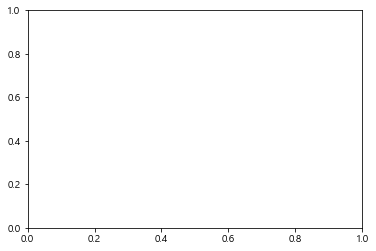

In [69]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.bar(x\, value)

In [65]:
df.columns

Index([('통계분류(1)', '통계분류(1)'), ('통계분류(2)', '통계분류(2)'), '연도', '독서장소', 'value'], dtype='object')

In [74]:
# df.rename( columns={"(통계분류(1), 통계분류(1))":"바꿀이름"}, inplace=True )
df.rename( columns={"통계분류(1)":"바꿀이름"}, inplace=True )
df

,"(통계분류(1), 통계분류(1))","(통계분류(2), 통계분류(2))",연도,독서장소,value
0,전체,소계,2004,사례수,752
1,성별,남자,2004,사례수,358
2,성별,여자,2004,사례수,394
3,연령별,20대 이하,2004,사례수,293
4,연령별,19~29세,2004,사례수,-
...,...,...,...,...,...
1623,연간독서량,6~15권,2017,기 타,-
1624,연간독서량,11~15권,2017,기 타,0.8
1625,연간독서량,16권 이상,2017,기 타,-
1626,연간독서량,16~20권,2017,기 타,1.4


In [ ]:
df.index_

In [75]:

import pandas as pd

values = [['부산동부경찰서', 2, 3], ['부산해운대경찰서', 5, 6], ['부산남부경찰서', 8, 9]]
index = ['one', 'two', 'three']
columns = ['(가(1)), (나)', '(다(2)), (라)', 'C']

df = pd.DataFrame(values, index=index, columns=columns)
print( df )
print(df.columns)

df.rename(columns={"(가(1)), (나)": "a", "(다(2)), (라)": "b"}, inplace=True)
print( df )


      (가(1)), (나)  (다(2)), (라)  C
one       부산동부경찰서            2  3
two      부산해운대경찰서            5  6
three     부산남부경찰서            8  9
Index(['(가(1)), (나)', '(다(2)), (라)', 'C'], dtype='object')
              a  b  C
one     부산동부경찰서  2  3
two    부산해운대경찰서  5  6
three   부산남부경찰서  8  9


In [55]:
df

,"(통계분류(1), 통계분류(1))","(통계분류(2), 통계분류(2))",연도,독서장소,value
0,전체,소계,2004,사례수,752
1,성별,남자,2004,사례수,358
2,성별,여자,2004,사례수,394
3,연령별,20대 이하,2004,사례수,293
4,연령별,19~29세,2004,사례수,-
...,...,...,...,...,...
1623,연간독서량,6~15권,2017,기 타,-
1624,연간독서량,11~15권,2017,기 타,0.8
1625,연간독서량,16권 이상,2017,기 타,-
1626,연간독서량,16~20권,2017,기 타,1.4


In [44]:
df.columns

Index([('통계분류(1)', '통계분류(1)'), ('통계분류(2)', '통계분류(2)'), '연도', '독서장소', 'value'], dtype='object')

In [19]:
# coloumns와 row 수를 확인하였다.
df.dtypes

통계분류(1)  통계분류(1)      object
통계분류(2)  통계분류(2)      object
2004     사례수          object
         집에서          object
         직장(학교)에서     object
                       ...  
2017     밖에서 이동할 때    object
         가리지않음        object
         카페에서         object
         서점에서         object
         기 타          object
Length: 76, dtype: object

In [8]:
df.describe()

통계분류(1) 통계분류(2) 2004                                             2006  \
       통계분류(1) 통계분류(2)  사례수 집에서 직장(학교)에서 출퇴근(통학)시 차 안에서 도서관에서 가리지않음 기 타  사례수   
count       44      44   44  44       44             44    44    44  44   44   
unique       9      38   11  11       11             11    10    10   9   11   
top         직업  16~20권    -   -        -              -     -     -   -    -   
freq         8       2   34  34       34             34    34    34  34   34   

        ... 2015 2017                                                   
        ...  기 타  사례수 집에서 직장(학교)에서 도서관에서 밖에서 이동할 때 가리지않음 카페에서 서점에서 기 타  
count   ...   44   44  44       44    44        44    44   44   44  44  
unique  ...   11   17  18       17    16        17    14   16   14  12  
top     ...    -    -   -        -     -         -     -    -    -   -  
freq    ...   27   27  27       27    27        27    27   27   27  27  

[4 rows x 76 columns]

In [9]:
df.shape

(44, 76)

In [10]:
## 결측치 NaN으로 처리
# df.astype(float) => '-' 문자 에러 발생
# pd.to_numeric(df, errors='coerce') => series만 처리 가능함
# df = df.apply(pd.to_numeric, errors='coerce', downcast='float')   # => apply 함수로 변화시켜 전체 데이터프레임에 적용

In [11]:
df.dtypes

통계분류(1)  통계분류(1)       
2004     사례수               object
         집에서               object
         직장(학교)에서          object
         출퇴근(통학)시 차 안에서    object
         도서관에서             object
                            ...  
2017     밖에서 이동할 때         object
         가리지않음             object
         카페에서              object
         서점에서              object
         기 타               object
Length: 74, dtype: object

In [11]:
df.columns

MultiIndex([('통계분류(1)',        '통계분류(1)'),
            ('통계분류(2)',        '통계분류(2)'),
            (   '2004',            '사례수'),
            (   '2004',            '집에서'),
            (   '2004',       '직장(학교)에서'),
            (   '2004', '출퇴근(통학)시 차 안에서'),
            (   '2004',          '도서관에서'),
            (   '2004',          '가리지않음'),
            (   '2004',            '기 타'),
            (   '2006',            '사례수'),
            (   '2006',            '집에서'),
            (   '2006',       '직장(학교)에서'),
            (   '2006', '출퇴근(통학)시 차 안에서'),
            (   '2006',          '도서관에서'),
            (   '2006',          '가리지않음'),
            (   '2006',            '기 타'),
            (   '2007',            '사례수'),
            (   '2007',            '집에서'),
            (   '2007',       '직장(학교)에서'),
            (   '2007', '출퇴근(통학)시 차 안에서'),
            (   '2007',          '도서관에서'),
            (   '2007',          '가리지않음'),
            (   '2007',            '기 타'),
           

In [13]:
df.count()

통계분류(1)  통계분류(1)       
2004     사례수               44
         집에서               44
         직장(학교)에서          44
         출퇴근(통학)시 차 안에서    44
         도서관에서             44
                           ..
2017     밖에서 이동할 때         44
         가리지않음             44
         카페에서              44
         서점에서              44
         기 타               44
Length: 74, dtype: int64

In [14]:
np.count_nonzero(df.isnull())

0

In [15]:
df.size

3256

In [16]:
df.isnull().sum()

통계분류(1)  통계분류(1)       
2004     사례수               0
         집에서               0
         직장(학교)에서          0
         출퇴근(통학)시 차 안에서    0
         도서관에서             0
                          ..
2017     밖에서 이동할 때         0
         가리지않음             0
         카페에서              0
         서점에서              0
         기 타               0
Length: 74, dtype: int64

In [17]:
np.count_nonzero(df)

3256

In [18]:
df.shape

(44, 74)

In [19]:
type(df.index)

pandas.core.indexes.multi.MultiIndex

In [20]:
df.index

MultiIndex([(           '전체',        '소계'),
            (           '성별',        '남자'),
            (           '성별',        '여자'),
            (          '연령별',    '20대 이하'),
            (          '연령별',    '19~29세'),
            (          '연령별',       '30대'),
            (          '연령별',       '40대'),
            (          '연령별',       '50대'),
            (          '연령별',    '50대 이상'),
            (          '연령별',       '60대'),
            (          '연령별',    '60세 이상'),
            (          '학력별',     '중졸 이하'),
            (          '학력별',        '고졸'),
            (          '학력별',      '대재이상'),
            (        '연간독서량',        '없음'),
            (        '연간독서량',      '1~5권'),
            (        '연간독서량',     '6~10권'),
            (        '연간독서량',     '6~15권'),
            (        '연간독서량',    '11~15권'),
            (        '연간독서량',    '16권 이상'),
            (        '연간독서량',    '16~20권'),
            (        '연간독서량',    '21권 이상'),
            (           '직업',   

In [ ]:
dfm